In [41]:
import pandas as pd
import numpy as np
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# import the data
data = pd.read_excel("./data/titanic3.xls")

df = data.copy()

In [3]:
#previeweing our dataset

df.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [4]:
#previewing the bottom of the dataset
df.tail()

pclass  survived                       name     sex   age  sibsp  parch  \
1304       3         0       Zabour, Miss. Hileni  female  14.5      1      0   
1305       3         0      Zabour, Miss. Thamine  female   NaN      1      0   
1306       3         0  Zakarian, Mr. Mapriededer    male  26.5      0      0   
1307       3         0        Zakarian, Mr. Ortin    male  27.0      0      0   
1308       3         0         Zimmerman, Mr. Leo    male  29.0      0      0   

      ticket     fare cabin embarked boat   body home.dest  
1304    2665  14.4542   NaN        C  NaN  328.0       NaN  
1305    2665  14.4542   NaN        C  NaN    NaN       NaN  
1306    2656   7.2250   NaN        C  NaN  304.0       NaN  
1307    2670   7.2250   NaN        C  NaN    NaN       NaN  
1308  315082   7.8750   NaN        S  NaN    NaN       NaN

In [5]:
# shape 
df.shape

(1309, 14)

In [6]:
# columns in our data 
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

## Data cleaning

#### 1. Data validation

In [7]:
#getting information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [8]:
# renaming  home.dest

df = df.rename(columns = {"home.dest":"destination"})
df.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                       destination  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

#### 2. Missing values

In [9]:
#check for missing values
df.isnull().sum()

pclass            0
survived          0
name              0
sex               0
age             263
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
boat            823
body           1188
destination     564
dtype: int64

handling missing values

    - Drop the column
    
    - Filling in the missing values:
        - Some specific value
        - Filling using the previous value
        - Filling in using the next value 
        - Filling in using the mean value
        - Popular value

In [10]:
# dropping columns with any missing values
df.drop(columns= ["cabin", "body"], inplace=True)
df.isnull().sum()

pclass           0
survived         0
name             0
sex              0
age            263
sibsp            0
parch            0
ticket           0
fare             1
embarked         2
boat           823
destination    564
dtype: int64

In [11]:
df

pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare embarked boat  \
0     female  29.0000      0      0   24160  211.3375        S    2   
1       male   0.9167      1      2  113781  151.5500        S   11   
2     female   2.0000      1      2  113781  151.5500        S  NaN   
3       male  30.0000      1      2  113781  151.5500        S  NaN   
4     female  25.0000      1      2  113781  151.5500        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...  ...   
1304  female  14.5000      1      0    2665   14.4542        C  NaN   
1305  female      NaN      1      0    2665   14.4542        C  NaN   
1306    male  26.5000      0      0    2656    7.2250        C  NaN   
1307    male  27.0000      0      0    2670    7.2250        C  NaN   
1308    male  29.0000      0      0  315082    7.8750        S  NaN   

                          destination  
0                        St Louis, MO  
1     Montreal, PQ / Chesterville, ON  
2     Montreal, PQ / Chesterville, ON  
3     Montreal, PQ / Chesterville, ON  
4     Montreal, PQ / Chesterville, ON  
...                               ...  
1304                              NaN  
1305                              NaN  
1306                              NaN  
1307                              NaN  
1308                              NaN  

[1309 rows x 12 columns]

30.0


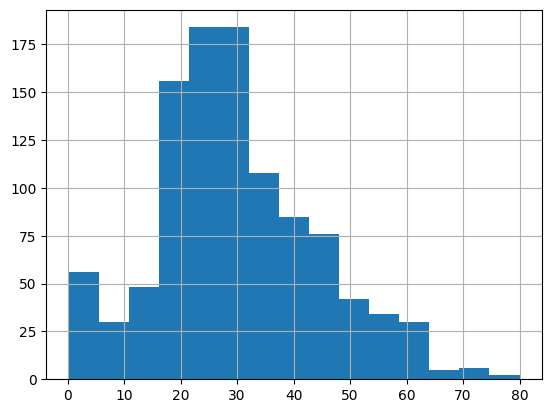

In [12]:
#drawing a histogra to get the context
df['age'].hist(bins=15)

print(df['age'].mean().round(0))

In [13]:
#filling in using the average age
df['age'].fillna(df['age'].mean(), inplace=True)

In [14]:
#using bfill
df['destination'] = df['destination'].bfill()

#getting the most popular value
df['destination'].value_counts()

#filling in using the most popular element
df['destination'] = df['destination'].fillna("Finland Sudbury, ON")

In [15]:
#using ffill
df['boat'] = df['boat'].ffill()

In [16]:
df['embarked'] = df.embarked.bfill()

In [17]:
df['fare'].fillna(df['fare'].mean(), inplace=True)

### Data types

data types 

    - String
    - Integer
    - Float
    - Boolean
    
Writing regex (regular expressions)

In [18]:
df.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare embarked boat  \
0  29.0000      0      0   24160  211.3375        S    2   
1   0.9167      1      2  113781  151.5500        S   11   
2   2.0000      1      2  113781  151.5500        S   11   
3  30.0000      1      2  113781  151.5500        S   11   
4  25.0000      1      2  113781  151.5500        S   11   

                       destination  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [19]:
#converting the age column to integer 
df['age'] = df['age'].astype(int)

### Outliers in python

This are extreme values found in numeric data.

Student marks

75, 34, 50, 55, 80, 2, 100

values that lie outside the 25 and 75 percentile 

can be detected visually using box plot

detecting outliers
- Visuallly using Histogras with KDEs and Boxplots
- Can be done mathematically usig Z-score

<AxesSubplot: >

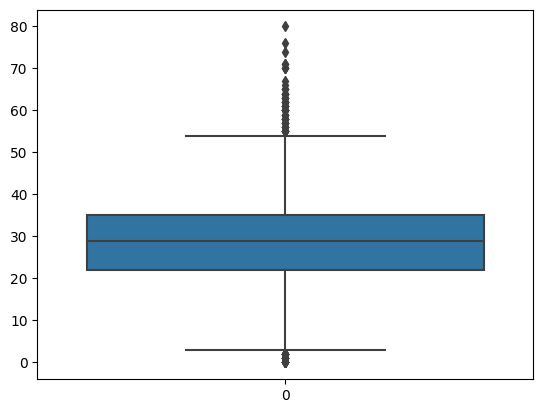

In [20]:
sb.boxplot(df['age'])

In [21]:
#summary statistics for age column
df['age'].describe()

count    1309.000000
mean       29.685256
std        12.899824
min         0.000000
25%        22.000000
50%        29.000000
75%        35.000000
max        80.000000
Name: age, dtype: float64

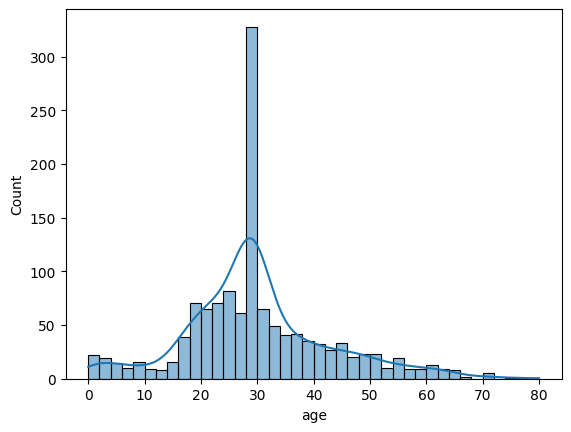

In [22]:
#plotting the histogram with a KDE

sb.histplot(data=df,x="age", kde=True, binwidth=2);

Z-score is also called the standard score

Understand how far a data value is from the mean. Threshold value -3 and 3

Zscore = (data_point - mean) / standard deviation

In [23]:
df.head(2)

pclass  survived                            name     sex  age  sibsp  \
0       1         1   Allen, Miss. Elisabeth Walton  female   29      0   
1       1         1  Allison, Master. Hudson Trevor    male    0      1   

   parch  ticket      fare embarked boat                      destination  
0      0   24160  211.3375        S    2                     St Louis, MO  
1      2  113781  151.5500        S   11  Montreal, PQ / Chesterville, ON

In [24]:
age = df['age']

age_mean = age.mean()
age_std = age.std()

z_score = (29 - age_mean)/age_std

print(z_score)

-0.053121340611472986


In [25]:
z_score = (age.max() - age_mean)/age_std
print(z_score)

3.900421109646418


In [26]:
df['age_zscores'] = stats.zscore(age)
df.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

   age  sibsp  parch  ticket      fare embarked boat  \
0   29      0      0   24160  211.3375        S    2   
1    0      1      2  113781  151.5500        S   11   
2    2      1      2  113781  151.5500        S   11   
3   30      1      2  113781  151.5500        S   11   
4   25      1      2  113781  151.5500        S   11   

                       destination  age_zscores  
0                     St Louis, MO    -0.053142  
1  Montreal, PQ / Chesterville, ON    -2.302094  
2  Montreal, PQ / Chesterville, ON    -2.146993  
3  Montreal, PQ / Chesterville, ON     0.024408  
4  Montreal, PQ / Chesterville, ON    -0.363342

The recommended threshold value for a z-score depends on the specific application and the context in which it is being used. In general, a z-score is a statistical measurement that indicates how many standard deviations a data point is from the mean of a group of data points.

In some cases, a z-score threshold of ±1.96 is used as a cut-off for statistical significance. This threshold corresponds to a p-value of 0.05, which is commonly used in many fields to determine if a result is statistically significant. However, the threshold value for a z-score may vary depending on the specific application and the desired level of significance.

It is important to note that while z-scores can be a useful tool for statistical analysis, they should not be used in isolation and should always be considered in the context of other relevant factors and considerations.

Dropping the outliers usign zscore method:

    - Filter out values that fallout of the range of -2 or + 2
    - Iterating throughout the rows and dropping any row with a zscore value greater than -2

In [27]:
for index, row in df.iterrows():
    if row['age_zscores'] <= -2 or row['age_zscores'] >= 2:
        df.drop(index, inplace=True)


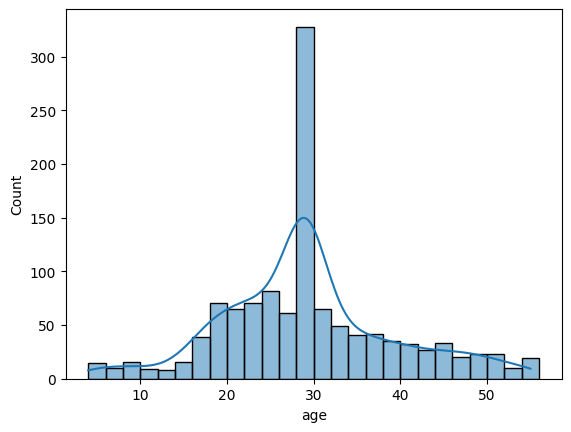

In [28]:
df = df.drop(columns=['age_zscores'])
sb.histplot(data=df,x="age", kde=True, binwidth=2);

In [29]:
df.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5       1         1                              Anderson, Mr. Harry    male   
7       1         0                           Andrews, Mr. Thomas Jr    male   

   age  sibsp  parch  ticket      fare embarked boat  \
0   29      0      0   24160  211.3375        S    2   
3   30      1      2  113781  151.5500        S   11   
4   25      1      2  113781  151.5500        S   11   
5   48      0      0   19952   26.5500        S    3   
7   39      0      0  112050    0.0000        S   10   

                       destination  
0                     St Louis, MO  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON  
5                     New York, NY  
7                      Belfast, NI

<AxesSubplot: >

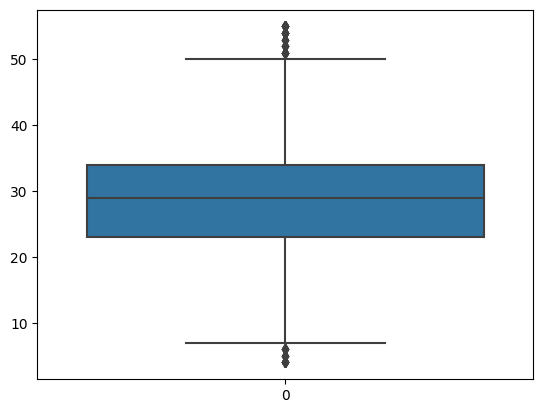

In [30]:
age = df['age']
sb.boxplot(age)

In [31]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked', 'boat', 'destination'],
      dtype='object')

## Joint plot

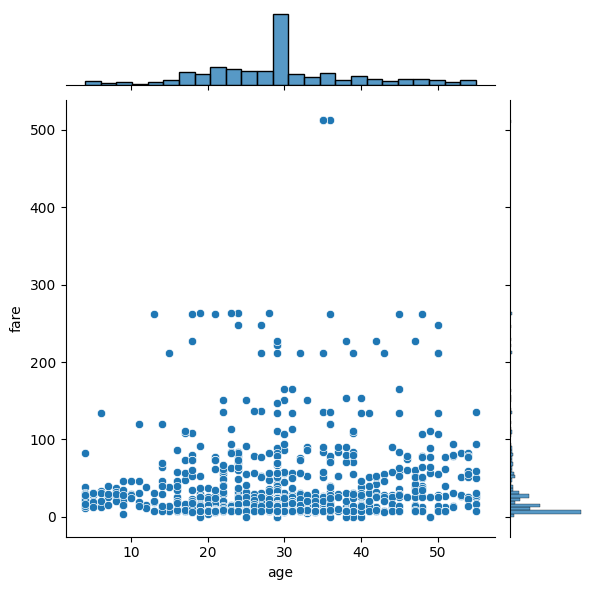

In [32]:
sb.jointplot(x="age", y="fare" ,data=df);

## Pairplot

In [33]:
df.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5       1         1                              Anderson, Mr. Harry    male   
7       1         0                           Andrews, Mr. Thomas Jr    male   

   age  sibsp  parch  ticket      fare embarked boat  \
0   29      0      0   24160  211.3375        S    2   
3   30      1      2  113781  151.5500        S   11   
4   25      1      2  113781  151.5500        S   11   
5   48      0      0   19952   26.5500        S    3   
7   39      0      0  112050    0.0000        S   10   

                       destination  
0                     St Louis, MO  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON  
5                     New York, NY  
7                      Belfast, NI

In [34]:
numeric_columns = df[['age', "fare"]]

numeric_columns.head()

age      fare
0   29  211.3375
3   30  151.5500
4   25  151.5500
5   48   26.5500
7   39    0.0000

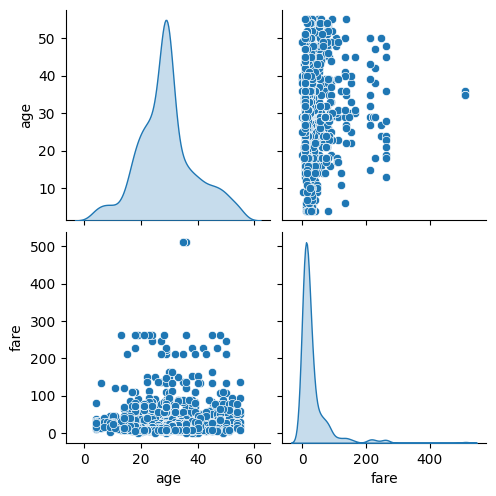

In [35]:
sb.pairplot(data=numeric_columns, diag_kind="kde")

## Linear regression

y = mx + b

- simple linear regression we do compare two variable a and b  

- b = constant
- m =  gradient 
- x is the value on the x axis 
- y the predicted variable 

In [36]:
numeric_columns.head(10)

age      fare
0    29  211.3375
3    30  151.5500
4    25  151.5500
5    48   26.5500
7    39    0.0000
8    53   51.4792
10   47  227.5250
11   18  227.5250
12   24   69.3000
13   26   78.8500

In [37]:
#splitting our data into the dependet and indpendet variable
y = numeric_columns['age'].to_numpy().reshape(-1, 1) # dependet variable / predicted variable
x = numeric_columns['fare'].to_numpy().reshape(-1, 1) # independet variable 

Split the data into train set and test set:
- Train set - it is used to train our algorithm and generate the final model that will be fitted on the test data. 70% - 80% of the total data
- Test set - test it is used to check the performance of our model 

Importance:
- Check for performance

In [38]:
import sklearn as sk
from sklearn.model_selection import train_test_split #split our data
from sklearn.linear_model import LinearRegression #algorithm

In [39]:
#splitting the data into the train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2)

In [40]:
#instatiate the algorithm
reg = LinearRegression()

#fit the data to the algorithm
reg.fit(X_train, y_train)

#getting the model scores
reg.score(X_test, y_test)

0.020691830963218805

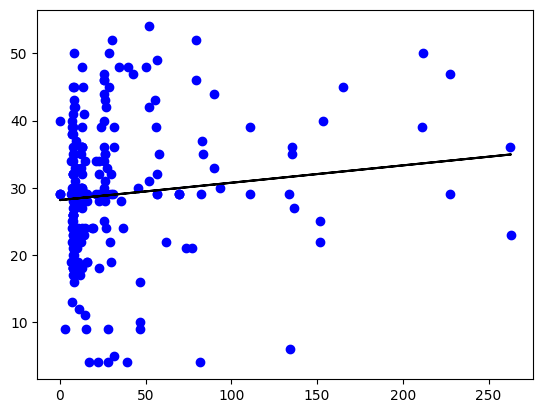

In [42]:
y_pred = reg.predict(X_test)
plt.scatter(X_test, y_test, color = 'b')
plt.plot(X_test, y_pred, color="k")

plt.show()